In [2]:
import pawData
reload(pawData)
import myutils
reload(myutils)
pawData.createDB()

Done 0 of 196 movies
Done 1 of 196 movies
Done 2 of 196 movies
Done 3 of 196 movies
Done 4 of 196 movies
Done 6 of 196 movies
Done 7 of 196 movies
Done 9 of 196 movies
Done 10 of 196 movies
Done 12 of 196 movies
Done 13 of 196 movies
Done 16 of 196 movies
Done 17 of 196 movies
Done 19 of 196 movies
Done 20 of 196 movies
Done 22 of 196 movies
Done 23 of 196 movies
Done 25 of 196 movies
Done 26 of 196 movies
Done 27 of 196 movies
Done 28 of 196 movies
Done 30 of 196 movies
Done 31 of 196 movies
Done 32 of 196 movies
Done 33 of 196 movies
Done 35 of 196 movies
Done 36 of 196 movies
Done 37 of 196 movies
Done 38 of 196 movies
Done 39 of 196 movies
Done 40 of 196 movies
Done 41 of 196 movies
Done 42 of 196 movies
Done 43 of 196 movies
Done 44 of 196 movies
Done 45 of 196 movies
Done 46 of 196 movies
Done 47 of 196 movies
Done 48 of 196 movies
Done 49 of 196 movies
Done 50 of 196 movies
Done 51 of 196 movies
Done 52 of 196 movies
Done 53 of 196 movies
Done 55 of 196 movies
Done 56 of 196 mov

In [1]:
import sys
sys.path.append('/home/mayank/work/pyutils')
sys.path.append('/home/mayank/work/tensorflow')
import pawMulti
reload(pawMulti)
import myutils
reload(myutils)
import pawconfig
reload(pawconfig)
import multiPawTools
reload(multiPawTools)


pawMulti.train()

Initialized the network
 Iter 100, Training Loss= 444.206055
 Iter 100, Minibatch Loss= 1777.315970
 Iter 200, Training Loss= 459.369263
 Iter 200, Minibatch Loss= 1829.876308
 Iter 300, Training Loss= 395.480988
 Iter 300, Minibatch Loss= 1576.197614
 Iter 400, Training Loss= 342.986847
 Iter 400, Minibatch Loss= 1384.330462
 Iter 500, Training Loss= 295.248169
 Iter 500, Minibatch Loss= 1288.075544
 Iter 600, Training Loss= 272.773102
 Iter 600, Minibatch Loss= 1300.258231
 Iter 700, Training Loss= 243.851990
 Iter 700, Minibatch Loss= 1103.353498
 Iter 800, Training Loss= 226.065277
 Iter 800, Minibatch Loss= 1019.950448
 Iter 900, Training Loss= 210.808289
 Iter 900, Minibatch Loss= 935.618679
 Iter 1000, Training Loss= 169.829193
 Iter 1000, Minibatch Loss= 860.603612
 Iter 1100, Training Loss= 166.148773
 Iter 1100, Minibatch Loss= 824.374747
 Iter 1200, Training Loss= 172.666885
 Iter 1200, Minibatch Loss= 802.057486
 Iter 1300, Training Loss= 164.214600
 Iter 1300, Minibatch Lo

In [75]:
sess = tf.InteractiveSession()

AttributeError: 'tuple' object has no attribute 'keys'

In [6]:
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
import pawconfig as conf

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint
from multiPawTools import scalepatches


L = sio.loadmat(conf.labelfile)
pts = L['pts']
ts = L['ts']
expid = L['expidx']
    


1999.0
True
255


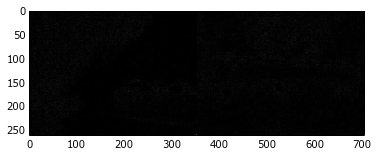

In [3]:
frames = np.where(expid[0,:]==4)[0]
fnum = ts[0,frames]
cap = cv2.VideoCapture('/home/mayank/Dropbox/AdamVideos/multiPoint/M118_20140730/M118_20140730_v002/movie_comb.avi')
print(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES,1)
stat,framein1 = cap.read()
cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES,2)
stat,framein2 = cap.read()
framein1 = framein1.astype('float')
framein2 = framein2.astype('float')
ddff = framein1-framein2
ddff = np.abs(ddff).astype('uint8')
print(stat)
if stat:
    plt.imshow(ddff)

print(ddff.max())    
cap.release()

In [4]:
import myutils
reload(myutils)
import cv2
cap = cv2.VideoCapture('/home/mayank/Dropbox/AdamVideos/multiPoint/M118_20140730/M118_20140730_v002/movie_comb.avi')
ff = myutils.readframe(cap,1998)
print(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT ))
cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES, 1998)
print(cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES))
stat,ff = cap.read()
print(cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES))
print(stat)

1999.0
1998.0
1999.0
True


In [5]:
import moviepy.video.io.ffmpeg_reader as freader
reader = freader.FFMPEG_VideoReader('/home/mayank/Dropbox/AdamVideos/multiPoint/M118_20140730/M118_20140730_v002/movie_comb.avi')
f1 = reader.get_frame((-2.-0.1)/reader.fps)
f2 = reader.get_frame((1.-0.1)/reader.fps)
fe = reader.get_frame((1998.-0.1)/reader.fps)
type(f1)


numpy.ndarray

In [6]:
import cv2
cap = cv2.VideoCapture('/home/mayank/Dropbox/AdamVideos/movie_comb.avi')
          


In [7]:
import pawconfig as conf
import scipy.io as sio
reload(conf)
L = sio.loadmat(conf.labelfile)
pts = L['pts']
ts = L['ts']
expid = L['expidx']
expid[0,3]

1

In [1]:
import lmdb
env = lmdb.open('cacheHead/val_lmdb', readonly=True)
txn = env.begin()
print(env.stat())

{'branch_pages': 1L, 'leaf_pages': 37L, 'overflow_pages': 24700L, 'psize': 4096L, 'depth': 2L, 'entries': 890L}


In [9]:
env.close()

In [2]:
import caffe
import numpy as np
import re
import matplotlib.pyplot as plt
import pawData
reload(pawData)
cursor =txn.cursor()
cursor.first()

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


True

In [6]:
import multiPawTools
reload(multiPawTools)
import pawconfig as conf
img,locs = multiPawTools.readLMDB(cursor,3,1)

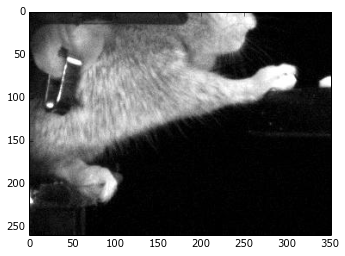

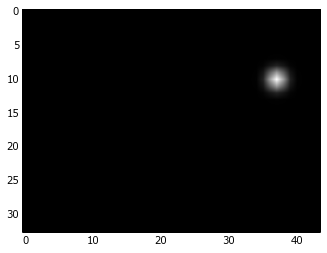

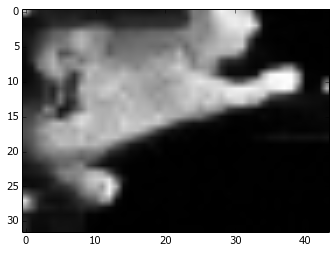

(1.0, -1.0)


In [7]:
from scipy import misc
from scipy import ndimage
reload(multiPawTools)
reload(conf)
plt.gray()
ndx = 2
img = img.transpose([0,2,3,1])
plt.imshow(img[ndx,:,:,0])
plt.show()

blurL = multiPawTools.createLabelImages(locs,conf.imsz,conf.rescale*conf.pool_scale,
                                        conf.label_blur_rad,1)
x0 = multiPawTools.scaleImages(img,conf.rescale)
x1 = multiPawTools.scaleImages(x0,conf.scale)
x2 = multiPawTools.scaleImages(x1,conf.scale)
# labels = np.zeros([img.shape[2]/4,img.shape[3]/4])
# labels[int(locs[ndx][1])/4,int(locs[ndx][0])/4] = 1
# blurL = ndimage.gaussian_filter(labels,sigma = 3)
# blurL = blurL/blurL.max()
plt.imshow(blurL[ndx,:,:,0])
plt.show()
plt.imshow(x2[ndx,:,:,0])
plt.show()
print(blurL.max(),blurL.min())

In [10]:
print(blurL[ndx,5:12,35:42,0])

[[-1.         -1.         -1.         -1.         -1.         -1.         -1.        ]
 [-0.9999092  -0.99959306 -0.99932907 -0.99959306 -0.9999092  -0.99999255
  -0.99999977]
 [-0.99699312 -0.98652411 -0.97778201 -0.98652411 -0.99699312 -0.99975318
  -0.99999255]
 [-0.96336872 -0.83583    -0.72932943 -0.83583    -0.96336872 -0.99699312
  -0.9999092 ]
 [-0.83583    -0.26424112  0.21306132 -0.26424112 -0.83583    -0.98652411
  -0.99959306]
 [-0.72932943  0.21306132  1.          0.21306132 -0.72932943 -0.97778201
  -0.99932907]
 [-0.83583    -0.26424112  0.21306132 -0.26424112 -0.83583    -0.98652411
  -0.99959306]]


In [18]:
print(blurL.shape)

(3, 33, 44, 1)


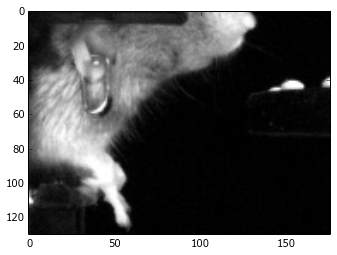

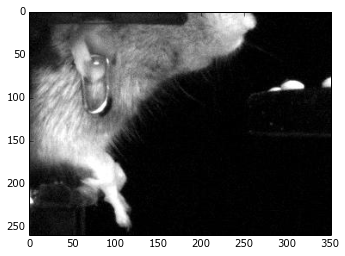

In [55]:
from scipy import misc
sz = img.shape
scale =2
simg = np.zeros((sz[0],sz[1],sz[2]/scale,sz[3]/scale))
for ndx in range(sz[0]):
    for chn in range(sz[1]):
        simg[ndx,chn,:,:] = misc.imresize(img[ndx,chn,:,:],1./scale)
plt.gray()        
plt.imshow(simg[1,0,:,:])        
plt.show()
plt.imshow(img[1,0,:,:])        
plt.show()

In [43]:
env.close()

In [1]:
import pawMulti
reload(pawMulti)
import pawconfig as conf
reload(conf)
import tensorflow as tf

imsz = conf.imsz
x0 = tf.placeholder(tf.float32, [None, imsz[0],imsz[1],1])
x1 = tf.placeholder(tf.float32, [None, imsz[0]/2,imsz[1]/2,1])
x2 = tf.placeholder(tf.float32, [None, imsz[0]/4,imsz[1]/4,1])
dropout = tf.placeholder(tf.float32)
labelimg = tf.placeholder(tf.float32, [None, imsz[0]/4,imsz[1]/4,1])

weights = pawMulti.initNetConvWeights()
pred = pawMulti.paw_net_multi_conv(x0,x1,x2,weights,dropout)

In [3]:
import numpy as np
imsz = conf.imsz
jj = np.ones([3,imsz[0],imsz[1],1])
jj1 = np.ones([3,imsz[0]/2,imsz[1]/2,1])
jj2 = np.ones([3,imsz[0]/4,imsz[1]/4,1])
sess.run(tf.initialize_all_variables())
out = sess.run(pred,feed_dict = {x0:jj,x1:jj1,x2:jj2,labelimg:jj2,dropout:1.})
print(out.shape)
print(jj2.shape)

(3, 65, 88, 2)
(3, 65, 88, 1)


In [2]:
sess = tf.InteractiveSession()


In [16]:
import tensorflow as tf
import numpy as np
x0 = tf.placeholder(tf.float32,[3,4])

jj = np.arange(12).reshape([2,3,2])
indices0 = tf.range(0,2*tf.shape(x0)[1],2)
indices1 = tf.range(1,2*tf.shape(x0)[1],2)
indices2 = tf.range(0,2*tf.shape(x0)[2],2)
indices3 = tf.range(1,2*tf.shape(x0)[2],2)

x1 = tf.transpose(tf.dynamic_stitch([indices0,indices1],[x0,x0]),[1,0])
x2 = tf.transpose(tf.dynamic_stitch([indices2,indices3],[x1,x1]),[1,0])

sess.run(tf.initialize_all_variables())
out = sess.run([x1,x2],feed_dict={x0:jj})
print(jj)
print(out[1])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[  0.   0.   1.   1.   2.   2.   3.   3.]
 [  0.   0.   1.   1.   2.   2.   3.   3.]
 [  4.   4.   5.   5.   6.   6.   7.   7.]
 [  4.   4.   5.   5.   6.   6.   7.   7.]
 [  8.   8.   9.   9.  10.  10.  11.  11.]
 [  8.   8.   9.   9.  10.  10.  11.  11.]]


In [13]:
sess.close()

In [ ]:
import tensorflow as tf

import os,sys
sys.path.append('/home/mayank/work/caffe/python')

import caffe
import lmdb
import caffe.proto.caffe_pb2
import pawconfig as conf

from caffe.io import datum_to_array
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import multiPawTools
import math
import pawMulti

learning_rate = conf.learning_rate
training_iters = conf.training_iters
batch_size = conf.batch_size
display_step = conf.display_step

# Network Parameters
n_input = conf.psz
n_classes = conf.n_classes # 
dropout = conf.dropout # Dropout, probability to keep units
imsz = conf.imsz
# tf Graph input
keep_prob = tf.placeholder(tf.float32) # dropout(keep probability)

x0 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.rescale,
                                 imsz[1]/conf.rescale,1])
x1 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.scale/conf.rescale,
                                 imsz[1]/conf.scale/conf.rescale,1])
x2 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.scale/conf.scale/conf.rescale,
                                 imsz[1]/conf.scale/conf.scale/conf.rescale,1])

lsz0 = int(math.ceil(float(imsz[0])/conf.pool_scale/conf.rescale))
lsz1 = int(math.ceil(float(imsz[1])/conf.pool_scale/conf.rescale))
y = tf.placeholder(tf.float32, [None, lsz0,lsz1,n_classes])

lmdbfilename =os.path.join(conf.cachedir,conf.trainfilename)
vallmdbfilename =os.path.join(conf.cachedir,conf.valfilename)
env = lmdb.open(lmdbfilename, map_size=conf.map_size)
valenv = lmdb.open(vallmdbfilename, map_size=conf.map_size)
txn = env.begin(write=True)
valtxn = valenv.begin(write=True)
train_cursor = txn.cursor()
val_cursor = valtxn.cursor()
weights = pawMulti.initNetConvWeights()

# Construct model
pred =pawMulti.paw_net_multi_conv(x0,x1,x2, weights, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.l2_loss(pred- y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

init = tf.initialize_all_variables()
saver = tf.train.Saver()

sess = tf.InteractiveSession()

sess.run(init)

saver.restore(sess, 'cache/pawMulti_r2_s3_20000.ckpt')
 

val_xs, locs = multiPawTools.readLMDB(val_cursor,batch_size*4,n_classes)
x0_in = multiPawTools.scaleImages(val_xs.transpose([0,2,3,1]),conf.rescale)
x1_in = multiPawTools.scaleImages(x0_in,conf.scale)
x2_in = multiPawTools.scaleImages(x1_in,conf.scale)
labelims = multiPawTools.createLabelImages(locs,
                           conf.imsz,conf.pool_scale*conf.rescale,
                           conf.label_blur_rad,1)
out = sess.run([pred,cost], feed_dict={x0:x0_in,
                                 x1:x1_in,
                                 x2:x2_in,
                           y: labelims, keep_prob: 1.})

In [1]:
import matplotlib.pyplot as plt
from IPython import display
import time
plt.ion()
fig,axs = plt.subplots(1,3)
plt.gray()
for ndx in range(256):
    plt.sca(axs[0])
    plt.imshow(x0_in[ndx,:,:,0])
    display.clear_output(wait=True)
#     display.display(plt.gcf())
    plt.sca(axs[1])
    plt.imshow(out[0][ndx,:,:,0])
    display.clear_output(wait=True)
#     display.display(plt.gcf())
    plt.sca(axs[2])
    plt.imshow(labelims[ndx,:,:,0])
    display.clear_output(True)
    display.display(fig)
    time.sleep(1)

mencoder mf:///tmp/tmp48yR9g/test_*.png -frames 2000 -mf type=png:fps=15 -o paw_detect.avi -ovc lavc -lavcopts vcodec=mpeg4:vbitrate=2000000


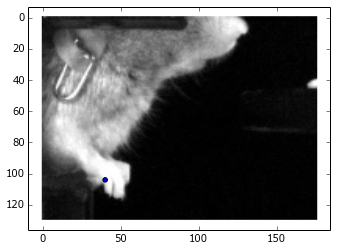

In [28]:
import cv2
import matplotlib.animation as manimation
sys.path.append('/home/mayank/work/pyutils')
import myutils
import matplotlib
import tempfile


curdir = '/home/mayank/Dropbox/AdamVideos/multiPoint/M122_20140828/M122_20140828_v002'
tdir = tempfile.mkdtemp()
# plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
# FFMpegWriter = manimation.writers['mencoder_file']
# writer = FFMpegWriter(fps=15,bitrate=2000)

fig = plt.figure()

cap = cv2.VideoCapture(os.path.join(curdir,'movie_comb.avi'))
nframes = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
plt.gray()
# with writer.saving(fig,"test_results.mp4",4):
count = 0
vidfilename = 'paw_detect.avi'
for fnum in range(nframes):
    plt.clf()
    framein = myutils.readframe(cap,fnum)
    framein = framein[np.newaxis,:,0:(framein.shape[1]/2),0:1]
    x0_in = multiPawTools.scaleImages(framein,conf.rescale)
    x1_in = multiPawTools.scaleImages(x0_in,conf.scale)
    x2_in = multiPawTools.scaleImages(x1_in,conf.scale)
    labelim = np.zeros([1,33,44,1])
    out = sess.run(pred, feed_dict={x0:x0_in,
                     x1:x1_in,
                     x2:x2_in,
                     y:labelim,
                     keep_prob: 1.})
    plt.imshow(x0_in[0,:,:,0])
    maxndx = np.argmax(out[0,:,:,0])
    loc = np.unravel_index(maxndx,out.shape[1:3])
    plt.scatter(loc[1]*4,loc[0]*4,hold=True)

    fname = "test_{:06d}.png".format(count)
    plt.savefig(os.path.join(tdir,fname))
    count+=1
#     plt.imshow(out[0,:,:,0])
#     fname = "test_heat_{:d}.png".format(fnum)
#     plt.savefig(fname)

#         writer.grab_frame()

ffmpeg_cmd = "ffmpeg -r 30 " + \
"-f image2 -i '/path/to/your/picName%d.png' -qscale 0 '/path/to/your/new/video.avi'

tfilestr = os.path.join(tdir,'test_*.png')
mencoder_cmd = "mencoder mf://" + tfilestr + \
" -frames " + "{:d}".format(count) + " -mf type=png:fps=15 -o " + \
vidfilename + " -ovc lavc -lavcopts vcodec=mpeg4:vbitrate=2000000"
print(mencoder_cmd)
os.system(mencoder_cmd)
cap.release()


In [19]:
import pawData
a,b,c = pawData.loadValdata()

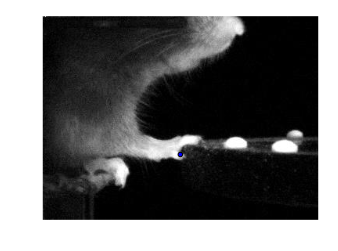

In [1]:
import pawData
import pawMulti
import scipy.io as sio
import pawconfig as conf
reload(pawMulti)
reload(conf)
import os
import numpy as np
import tensorflow as tf
import tempfile
import matplotlib.pyplot as plt
import cv2
import sys,copy
sys.path.append('/home/mayank/work/pyutils')
import myutils


isval,localdirs,seldirs = pawData.loadValdata()
model_file = 'cache/pawMulti_r2_s3_20000.ckpt'
movcount = 0
maxcount = 5
L = sio.loadmat(conf.labelfile)
pts = L['pts']
ts = L['ts']
expid = L['expidx']

pred,saver,pholders = pawMulti.initPredSession()
tdir = tempfile.mkdtemp()

plt.gray()
# with writer.saving(fig,"test_results.mp4",4):
fig = plt.figure()

with tf.Session() as sess:
    saver.restore(sess, model_file)
    for ndx,dirname in enumerate(localdirs):
        if movcount> maxcount:
            break
        if not seldirs[ndx]:
            continue

        expname = os.path.basename(dirname)
        frames = np.where(expid[0,:] == (ndx + 1))[0]
        curdir = localdirs[ndx]
        outmovie = expname + ".avi"
        cap = cv2.VideoCapture(os.path.join(curdir,'movie_comb.avi'))
        nframes = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))

        count = 0
        for fnum in range(nframes):
            plt.clf()
            plt.axis('off')
            framein = myutils.readframe(cap,fnum)
            framein = framein[:,0:(framein.shape[1]/2),0:1            out = pawMulti.predict(copy.copy(framein),sess,pred,pholders)
            plt.imshow(framein[:,:,0])
            maxndx = np.argmax(out[0,:,:,0])
            loc = np.unravel_index(maxndx,out.shape[1:3])
            scalefactor = conf.rescale*conf.pool_scale
            plt.scatter(loc[1]*scalefactor,loc[0]*scalefactor,hold=True)

            fname = "test_{:06d}.png".format(count)
            plt.savefig(os.path.join(tdir,fname))
            count+=1

    #     ffmpeg_cmd = "ffmpeg -r 30 " + \
    #     "-f image2 -i '/path/to/your/picName%d.png' -qscale 0 '/path/to/your/new/video.avi'

        tfilestr = os.path.join(tdir,'test_*.png')
        mencoder_cmd = "mencoder mf://" + tfilestr + \
        " -frames " + "{:d}".format(count) + " -mf type=png:fps=15 -o " + \
        outmovie + " -ovc lavc -lavcopts vcodec=mpeg4:vbitrate=2000000"
    #     print(mencoder_cmd)
        os.system(mencoder_cmd)
        cap.release()

        movcount+=1

In [1]:
import tensorflow as tf

sess = tf.InteractiveSession()

kk = tf.constant([3,-2,0.1,-0.05,5])
ss = tf.sign(kk)
mm = tf.mul(ss,tf.maximum(tf.abs(kk)-0.2,0))
aa = mm.eval()
print(aa)

[ 2.79999995 -1.79999995  0.         -0.          4.80000019]


In [1]:
import lmdb
lmdbfilename= 'cacheHeadSide/train_lmdb'
env = lmdb.open(lmdbfilename, readonly = True)


txn = env.begin()
print(txn.stat()['entries'])

1563


/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _

(1, 1, 512, 512)
[[(66, 193), (56, 215), (98, 146), (88, 160), (91, 224)]]


/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


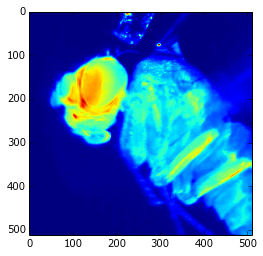

In [2]:
import PoseTools
import multiResData
cursor = txn.cursor()
ii,ll = PoseTools.readLMDB(cursor,1,[512, 512],multiResData)
print ii.shape
print ll
plt.imshow(ii[0,0,:,:])

In [11]:
import pickle

with open('cacheHead/headMRFtraindata','rb') as f:
    gg = pickle.load(f)
    

['step_no', 'val_base_dist', 'val_dist', 'val_err', 'train_dist', 'train_err', 'train_base_err', 'train_base_dist', 'val_base_err']


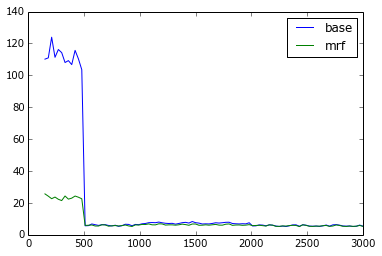

In [37]:
print gg[0].keys()
plt.clf()
x = gg[0]['step_no'][5:]
plt.plot(x,gg[0]['val_base_dist'][5:])
plt.plot(x,gg[0]['val_dist'][5:], hold=True)
plt.legend(('base','mrf'))

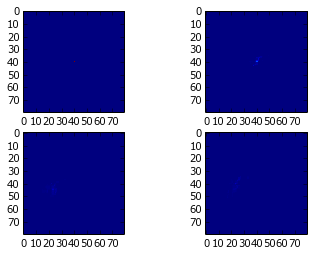

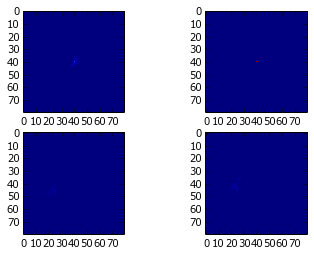

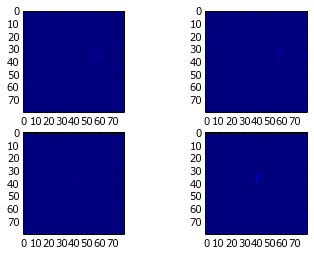

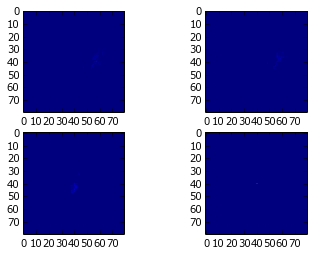

In [28]:
from janLegConfig import conf as conf
# from stephenHeadConfig import sideconf as conf
import PoseTools

jj = PoseTools.initMRFweights(conf)
jj.shape
for ndx in range(conf.n_classes):
    fig = plt.figure()
    for ii in range(conf.n_classes):
        ax1 = fig.add_subplot(2,2,ii+1)
        ax1.imshow(jj[:,:,ndx,ii],interpolation='nearest',vmax=1.,vmin=0.)
    plt.show()
    

In [26]:
np.set_printoptions(precision=2)
# print jj[35:45,35:45,0,1]
print np.array_str(jj[35:45,35:45,2,3],precision=2,suppress_small = True)

[[ 0.    0.    0.    0.    0.01  0.07  0.03  0.02  0.    0.  ]
 [ 0.    0.    0.    0.    0.03  0.04  0.03  0.01  0.01  0.  ]
 [ 0.    0.    0.    0.01  0.05  0.03  0.01  0.01  0.01  0.  ]
 [ 0.    0.    0.    0.01  0.03  0.05  0.01  0.02  0.01  0.  ]
 [ 0.    0.    0.    0.01  0.02  0.05  0.01  0.01  0.    0.  ]
 [ 0.    0.    0.    0.01  0.02  0.05  0.01  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.01  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.01  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


In [9]:
from stephenHeadConfig import conf as conf
import multiResData
a,b,c = multiResData.loadValdata(conf)
print max(int(len(a)/conf.holdoutratio),1)
print len(a)
print a
print a.index(88)

47
38
[119, 79, 126, 88, 21, 116, 12, 107, 96, 71, 98, 42, 16, 68, 2, 89, 95, 112, 20, 106, 114, 49, 54, 43, 55, 26, 1, 101, 35, 117, 78, 108, 122, 19, 74, 121, 73, 32]
3


In [7]:
from stephenHeadConfig import conf as conf
import multiResData
isval,a,b = multiResData.loadValdata(conf)
n_ho = min(max(int(len(isval)*conf.holdoutratio),1),len(isval)-1)
print n_ho
print isval.index(73)
print len(isval)

30
36
38


In [1]:
from stephenHeadConfig import sideconf as conf
import multiResData
reload(multiResData)
multiResData.createHoldoutData(conf)

Done 1 of 127 movies, train:3 test:0
Done 2 of 127 movies, train:5 test:0
Done 12 of 127 movies, train:8 test:0
Done 16 of 127 movies, train:10 test:0
Done 19 of 127 movies, train:10 test:0
Done 20 of 127 movies, train:13 test:0
Done 21 of 127 movies, train:16 test:0
Done 26 of 127 movies, train:18 test:0
Done 32 of 127 movies, train:18 test:3
Done 35 of 127 movies, train:21 test:3
Done 42 of 127 movies, train:24 test:3
Done 43 of 127 movies, train:24 test:3
Done 49 of 127 movies, train:24 test:3
Done 54 of 127 movies, train:24 test:3
Done 55 of 127 movies, train:27 test:3
Done 68 of 127 movies, train:27 test:3
Done 71 of 127 movies, train:30 test:3
Done 73 of 127 movies, train:30 test:3
Done 74 of 127 movies, train:30 test:4
Done 78 of 127 movies, train:30 test:4
Done 79 of 127 movies, train:30 test:4
Done 88 of 127 movies, train:75 test:4
Done 89 of 127 movies, train:120 test:4
Done 95 of 127 movies, train:165 test:4
Done 96 of 127 movies, train:210 test:4
Done 98 of 127 movies, trai

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
